In [1]:
#pip install tensorflow

In [2]:
import tensorflow 
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
import keras
from keras.models import Sequential #importing model from keras
from keras.layers import Dense
from keras import utils  
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers.core import Dense,Activation,Dropout

In [4]:
mnist=keras.datasets.fashion_mnist


In [5]:
(x_train, y_train),(x_test, y_test)= mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape )

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

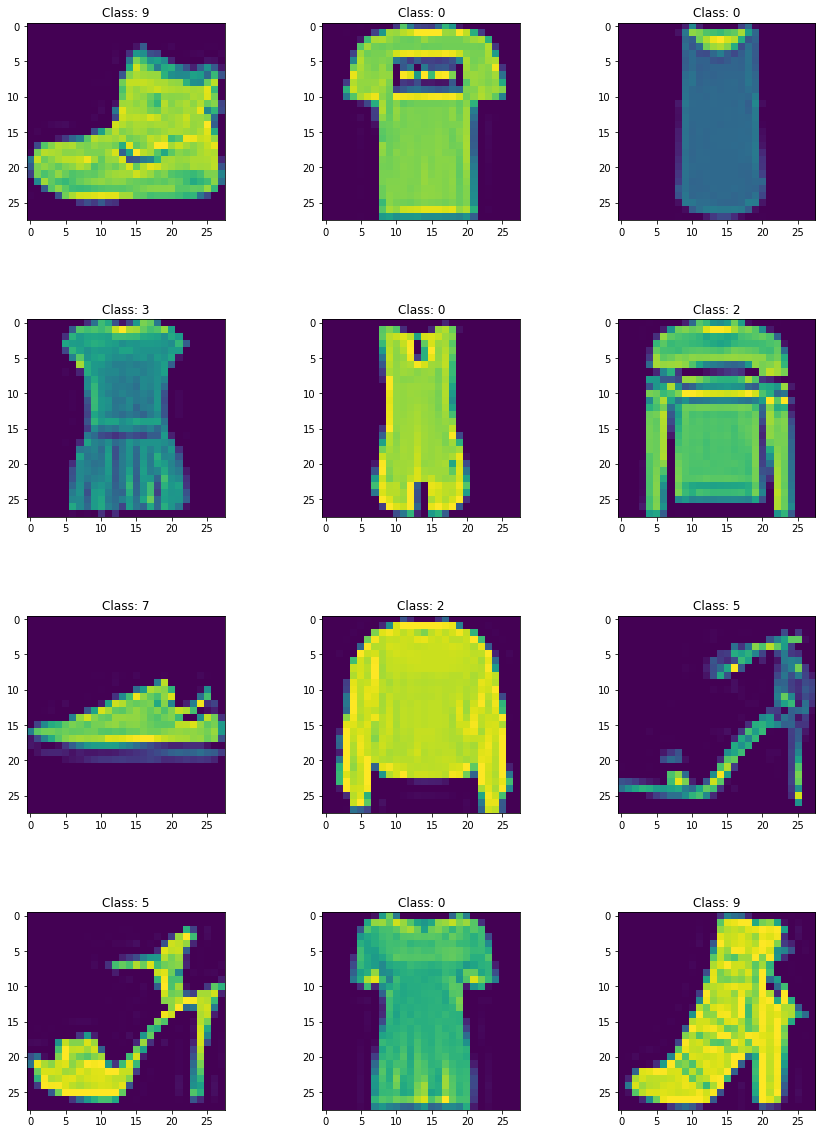

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=3,figsize=(15,20))          
ax = axes.ravel()
for i in range(12):
    ax[i].imshow(x_train[i])
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

In [10]:
#Reshaping the data 2D
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [11]:
x_train[0]


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
#one- hot encoding the target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
print(y_train[1])
print(y_test[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
#Scaling the value
minmax=MinMaxScaler()

In [16]:
x_train=minmax.fit_transform(x_train)
x_test=minmax.transform(x_test)

In [17]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
#lets split the tarin data further into trainig set and validationd set
x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, test_size=0.2, random_state=1)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(48000, 784) (12000, 784) (48000, 10) (12000, 10)


In [19]:
model_1= Sequential()                           #model initialization

# adding the first layer to the model (hidden)
model_1.add(Dense(input_dim=x_train.shape[1], units=256, kernel_initializer='uniform', activation='relu'))

#adding the output layer
model_1.add(Dense(10, activation='softmax'))

#compile the model for model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [21]:
#fitting the model to train data

model_1_fit = model_1.fit(x_train, y_train, epochs=20, batch_size=1, validation_data=(x_val, y_val), verbose=1)

Epoch 1/20
48000/48000 [==============================] - 132s 3ms/step - loss: 0.5247 - accuracy: 0.8130 - val_loss: 0.4340 - val_accuracy: 0.8484
Epoch 2/20
39008/48000 [=======================>......] - ETA: 19s - loss: 0.4261 - accuracy: 0.8513

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(model_1_fit.history['loss'], color='blue', label='train')
plt.plot(model_1_fit.history['val_loss'], color='green', label='validation_data')
plt.title("Cross Entropy Loss")

plt.subplot(1,2,2)
#plt.figure(figsize=(15,8))
plt.plot(model_1_fit.history['accuracy'], color='blue', label='train')
plt.plot(model_1_fit.history['val_accuracy'], color='green', label='validation_data')
plt.title("classification Accuracy")
plt.show()

In [ ]:
model_evaluate=model_1.evaluate(x_test, y_test, verbose=1)

In [ ]:
model_evaluate

In [ ]:
print("The model accuracy is on the test dataset:", np.round(model_evaluate[1]*100,2) ,"%")

In [ ]:
y_predict=model_1.predict(x_test)

In [ ]:
y_predict[:10]

In [ ]:
y_predict=np.argmax(y_predict, axis=1)

In [ ]:
y_test=np.argmax(y_test, axis=1)

In [ ]:
y_test[:10]

In [ ]:
con_mat=confusion_matrix(y_predict, y_test)
con_mat

In [ ]:
#sns.cubehelix_palette(as_cmap=True)
plt.figure(figsize=(15,15))
ax=sns.heatmap(con_mat, annot=True, cmap="PiYG", fmt='d')
bottom, top=ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

In [ ]:
def model_tuning(layers, activation):
    model=Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes, input_dim=x_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
              

In [ ]:
model_keras=KerasClassifier(build_fn=model_tuning, verbose=0)
layers=[(20,), (40,20), (40,35,15)]
activation=['sigmoid', 'relu', 'softmax']
param_grid=dict(layers=layers, activation=activation, batch_size=[28, 50], epochs=[30])
grid=GridSearchCV(estimator=model_keras, param_grid=param_grid, cv=5)
grid_result=grid.fit(x_train, y_train)
grid_result.best_score_

In [ ]:
grid_result.best_params_

In [ ]:
y_pred=grid.predict(x_test)

In [ ]:
y_pred=np.argmax(y_pred)

In [ ]:
plt.figure(figsize=(15,15))
ax=sns.heatmap(con_mat, annot=True, cmap="PiYG", fmt='d')
bottom, top=ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

In [ ]:
accuracy_score=accuracy_score(y_pred, y_test)
accuracy_score